In [17]:
import sys
from os.path import abspath
sys.path.insert(0, abspath('..'))

from os.path import join

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np


import torch
from torchSTC.data import load_data
from torchSTC.modules import STC
from torchSTC.metrics import SpacePlot, Evaluate
from torchSTC.utils.cluster import SphericalKmeans

plot = SpacePlot()
eval = Evaluate()

In [43]:
cur = abspath("")
dataset = 'SearchSnippets'
data_in_dir=join(cur, "../..", "datasets")
dataset_dir=join(data_in_dir, dataset)

In [56]:
checkpoint_dir=join(dataset_dir, 
                    "artefacts",
                    "STC-d48:500:500:2000:20-epoch30-datSearchSnippets-wdeWord2Vec-scaMinMax-tfeNone-norml2-initKmeans"
                    )

checkpoint = "STC-datSearchSnippets-wdeWord2Vec-scaMinMax-tfeNone-norml2-initKmeans.pth"
checkpoint_path = join(checkpoint_dir, checkpoint)
checkpoint_path

'/home/godwin/Documents/academic/PPD/torchSTC/demos/SearchSnippets/../../datasets/SearchSnippets/artefacts/STC-d48:500:500:2000:20-epoch30-datSearchSnippets-wdeWord2Vec-scaMinMax-tfeNone-norml2-initKmeans/STC-datSearchSnippets-wdeWord2Vec-scaMinMax-tfeNone-norml2-initKmeans.pth'

In [57]:
x, y = load_data(dataset=dataset_dir, word_emb='Word2Vec', transform=None, scaler='MinMax', norm='l2')
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(checkpoint_path)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Embedding started...
Word2Vec words embedding loaded...
Average embedding completed...
### Embedding completed...
>>> |  (12340, 48)
MinMax scaling completed...
l2 normalization completed...


(torch.Size([11106, 48]),
 torch.Size([1234, 48]),
 torch.Size([11106]),
 torch.Size([1234]))

In [58]:
z = stc.autoencoder.encoder(X_train)

In [59]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_hgf_mmx_ikm = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_km_pred))

avg_hgf_mmx_ikm = np.array(tmp)
np.round(avg_hgf_mmx_ikm.mean(axis=0), 3) * 100, avg_hgf_mmx_ikm.std(axis=0)

(array([75.4, 55.6, 52.1]), array([0., 0., 0.]))

In [60]:
# comprehension list with 5 runs of Sherical kmeans, get average and std of metrics
avg_hgf_mmx_iskm = []
tmp = []
for i in range(5):
    skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
    skmeans.fit(z.detach().numpy())
    y_skm_pred = skmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_skm_pred))

avg_hgf_mmx_iskm = np.array(tmp)
np.round(avg_hgf_mmx_iskm.mean(axis=0), 3) * 100, avg_hgf_mmx_iskm.std(axis=0)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iter

(array([69.4, 52.8, 46.3]), array([0.05927179, 0.01725568, 0.03083154]))

In [61]:
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z.detach().numpy())
y_km_pred = kmeans.labels_


skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
skmeans.fit(z.detach().numpy())
y_skm_pred = skmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19


In [62]:
print(min(y_km_pred), len(np.unique(y_km_pred)), max(y_km_pred))
print(min(y_skm_pred), len(np.unique(y_skm_pred)), max(y_skm_pred))

0 8 7
0 8 7


In [63]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred)

[0.7539, 0.5564, 0.5211]

In [64]:
eval.allMetrics(y_train.detach().numpy(), y_skm_pred)

[0.7328, 0.5394, 0.4837]

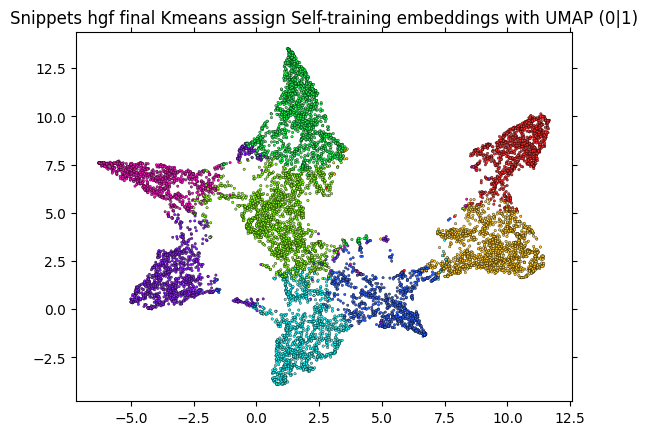

In [65]:
plot.commonSpace_plot(z.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred,
                      data_name="Snippets hgf final Kmeans assign", dimred = 'UMAP')

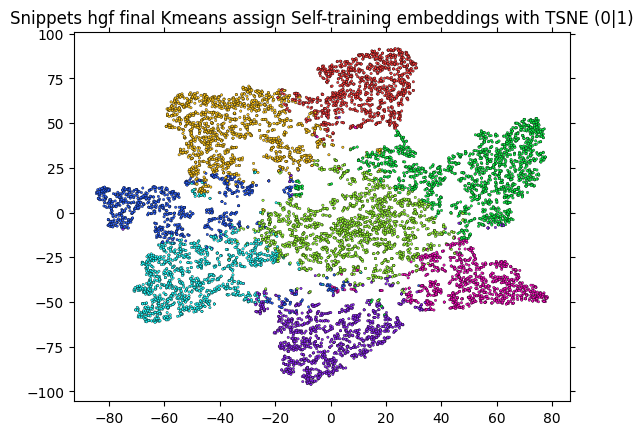

In [66]:
plot.commonSpace_plot(z.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred,
                      data_name="Snippets hgf final Kmeans assign", dimred = 'TSNE')

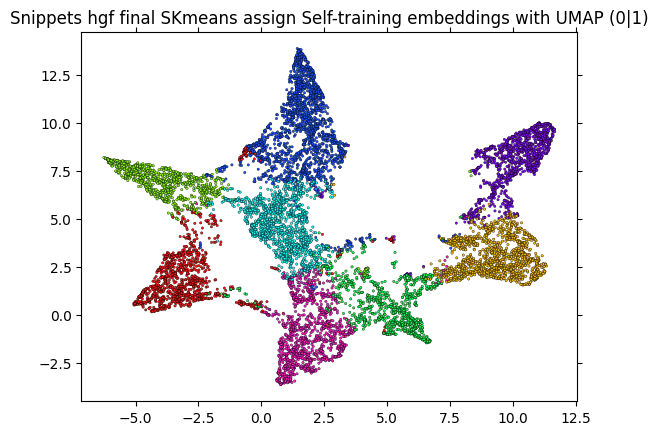

In [67]:
plot.commonSpace_plot(z.detach().numpy(), comp=[0, 1], tagLabels=y_skm_pred, 
                      data_name="Snippets hgf final SKmeans assign", dimred = 'UMAP')

In [72]:
checkpoint_dir=join(dataset_dir, 
                    "artefacts",
                    "STC-d48:500:500:2000:20-epoch20-datSearchSnippets-wdeWord2Vec-scaMinMax-tfeSIF-normNone-initKmeans"
                    )

checkpoint = "STC-datSearchSnippets-wdeWord2Vec-scaMinMax-tfeSIF-normNone-initKmeans.pth"
checkpoint_path = join(checkpoint_dir, checkpoint)
checkpoint_path

'/home/godwin/Documents/academic/PPD/torchSTC/demos/SearchSnippets/../../datasets/SearchSnippets/artefacts/STC-d48:500:500:2000:20-epoch20-datSearchSnippets-wdeWord2Vec-scaMinMax-tfeSIF-normNone-initKmeans/STC-datSearchSnippets-wdeWord2Vec-scaMinMax-tfeSIF-normNone-initKmeans.pth'

In [73]:
x, y = load_data(dataset=dataset_dir, word_emb='Word2Vec', transform='SIF', scaler='MinMax', norm=None)
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(checkpoint_path)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Embedding started...
Word2Vec words embedding loaded...
>>> /home/godwin/Documents/academic/PPD/torchSTC/demos/SearchSnippets/../../datasets/SearchSnippets
#### SIF embedding started...
SIF-Embedding 12339 documents with 48-dimensional word vectors...
SVD decomposition...
### SIF embedding completed...
### Embedding completed...
[embed_docs] XX shape:  (12340, 48)
>>> |  (12340, 48)
MinMax scaling completed...
No normalization applied...


(torch.Size([11106, 48]),
 torch.Size([1234, 48]),
 torch.Size([11106]),
 torch.Size([1234]))

In [74]:
z2 = stc.autoencoder.encoder(X_train)

In [75]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_hgf_mmx_ikm2 = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z2.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_km_pred))

avg_hgf_mmx_ikm2 = np.array(tmp)
np.round(avg_hgf_mmx_ikm2.mean(axis=0), 3) * 100, avg_hgf_mmx_ikm2.std(axis=0)

(array([70.9, 56.2, 52.8]),
 array([4.89897949e-05, 1.35646600e-04, 8.00000000e-05]))

In [76]:
# comprehension list with 5 runs of Sherical kmeans, get average and std of metrics
avg_hgf_mmx_iskm2 = []
tmp = []
for i in range(5):
    skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
    skmeans.fit(z2.detach().numpy())
    y_skm_pred = skmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_skm_pred))

avg_hgf_mmx_iskm2 = np.array(tmp)
np.round(avg_hgf_mmx_iskm2.mean(axis=0), 3) * 100, avg_hgf_mmx_iskm2.std(axis=0)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iter

(array([69.7, 54.7, 50.9]), array([0.04728184, 0.01727442, 0.02890769]))

In [77]:
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z2.detach().numpy())
y_km_pred2 = kmeans.labels_


skmeans = SphericalKmeans(n_clusters=n_clusters, n_init=50)
skmeans.fit(z2.detach().numpy())
y_skm_pred2 = skmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteratio

In [78]:
print(min(y_km_pred2), len(np.unique(y_km_pred2)), max(y_km_pred2))
print(min(y_skm_pred2), len(np.unique(y_skm_pred2)), max(y_skm_pred2))

0 8 7
0 8 7


In [79]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred2)

[0.7094, 0.5618, 0.5283]

In [80]:
eval.allMetrics(y_train.detach().numpy(), y_skm_pred2)

[0.7054, 0.552, 0.5125]

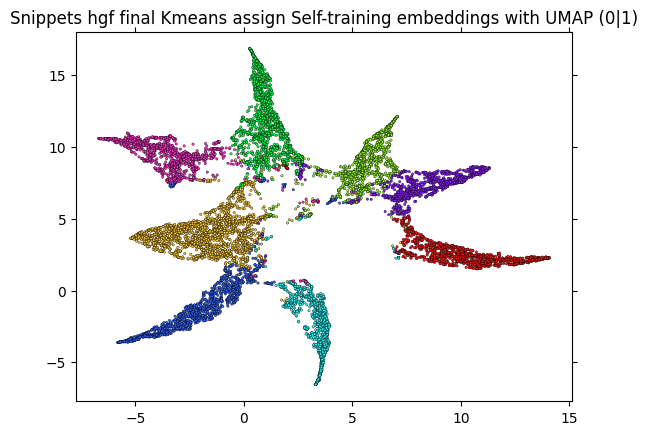

In [81]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred2,
                      data_name="Snippets hgf final Kmeans assign", dimred = 'UMAP')

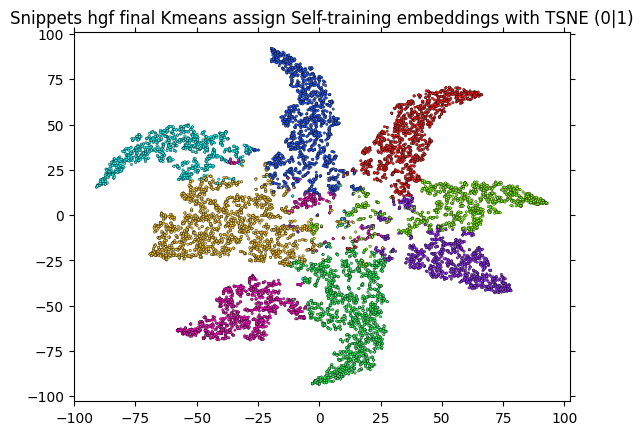

In [82]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred2,
                      data_name="Snippets hgf final Kmeans assign", dimred = 'TSNE')

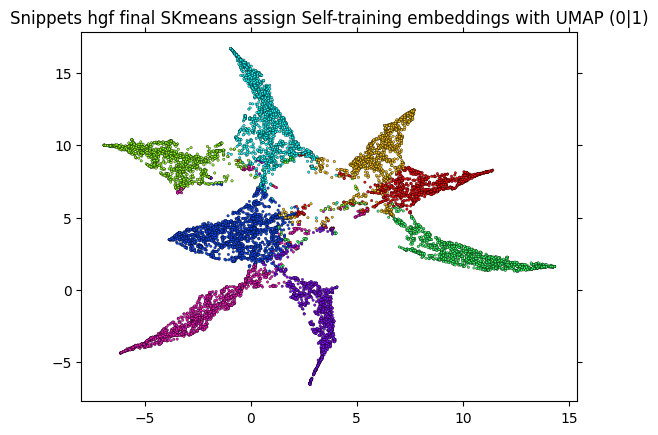

In [83]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_skm_pred2, 
                      data_name="Snippets hgf final SKmeans assign", dimred = 'UMAP')